## Description

## research questions

- any chromosomes particularly important?
- visualize genes on particular loci?
- any chromosomes particularly important?
- any genotypes more prevalent than others?    
- what is the proportion of variants in coding vs noncoding regions?
- what is the propoertion of SNPs in 

##### DS-relevant
- clustering
    - by using the info, OR, SE, and logp as features, are there any clusters?
    - what would these clusters mean?
- classification
    - can we predict chromosome, given other features?
- Regression
- Dimensionality Reduction


## general questions
- what is linkage disequilibrium score regression?
    - for polygenic risk score estimation
    - $S = \sum_{j=1}^m X_jB_j$
    - weighted sum of individual's marker genotyped, $X_j$, at $m$ SNPs
    - Weights of SNPs ($B_j$) generated with linkage disequilibrium score
    - Bayesian approach. Set weight for each SNP equal to the average of its posterior distribution after linkage disequilibrium has been accounted for.
    - [GitHub - bulik/ldsc: LD Score Regression (LDSC)](https://github.com/bulik/ldsc)
    - 
- how are polygenic risk scores calculated?
- what does it mean to adjust deciles of polygenic risk scores?
- What is Nagelkerke's $R^2$?
- How does imputation information score work?
- What is liability-scale SNP heritability?
- What is cryptic relatedness? What is population stratification?
- 

## papers

#### Finucane et al: describes partitioning SNP heritability by functional annotations
- partitioned LD score regression

#### Sullivan et al: ld score regression
- quantifies contribution of 

### demontis et al
- index variants <400kb apart are considered one locus

####  ADHD GWAS
- 20,183 ADHD cases, 35,191 controls, 12 cohorts
- big cohort from Denmark, 11 European/NA/Chinese cohorts
- participants diagnosed by psychiatrists according to **ICD10**
- bioinformatics pipeline for QA used: [**Ricopili**](https://github.com/Nealelab/ricopili)
  - SNP call rate > 0.95 before sample removal
  - subject call rate > 0.98 (>0.95 for iPSYCH samples)
  - autosomal heterozygosity deviation ($|F_{het}|<0.2$)
  - SNP call rate > 0.98 after sample removal
  - difference in SNP missingness between cases and controls < 0.02
  - SNP Hardy-Weinberg equilibrium $P > 10^6$ in controls, $P>10^{10}$ in cases
  - related individuals removed
  - genetic outliers excluded based on PCA
  - non-genotyped markers imputed with 1000 Genomes Project Phase 3 reference panel
- GWAS conducted with logistic regression per-cohort, with imputed additive genotype dosages
- Principal components included as covariates to correct for population stratification
  - Variants with imputation INFO score < 0.8 or minor allele frequency (MAF) < 0.01 excluded
- GWAS meta-analyzed using inverse-variance weighted fixed effects model
- Association results considered only for variants with effective sample size greater than 70% of the full meta-analysis
  - 8,047,421 variants in final meta-analysis
  - meta-analysis restricted to European-ancestry individuals to facilitate secondary analysis
- 304 variants in 12 loci surpassed threshold of $P<5 * 10^{-8}$
- more heritability in conserved regions
- more heritability in CNS variants
  
#### GWAS data dictionary
- CHR Chromosome (hg19)
- SNP Marker name
- BP Base pair location (hg19)
- A1 Reference allele for OR (may or may not be minor allele)
- A2 Alternative allele
- INFO Imputation information score
- OR Odds ratio for the effect of the A1 allele
- SE Standard error of the log(OR)
- P P-value for association test in the meta-analysis

### power and pred. accuracy of polygenic risk scores


## Genes

rs11420276 – chr1, ST3GAL3, KDM4A, KDM4A-AS1, PTPRF, SLC6A9, ARTN, DPH2, ATP6V0B, B4GALT2, CCDC24, IPO13, G, GT  
rs1222063 – chr1, intergenic. A, G.  
rs9677504 – chr2, SPAG16. A, G.  
rs4858241 – chr3, intergenic. T, G.  
rs28411770 – chr4, PCDH7, LINC02497. T, C.  
rs4916723 - LINC00461, MIR9-2, LINC02060, TMEM161B-AS1. A, C  
rs5886709 – FOXP2, MIR3666. G, GTC.  
rs74760947 – LINC01288. A, G.  
rs11591402 – SORCS3. A, T.  
rs1427829 – DUSP6, POC1B. A, G.  
rs281324 – SEMA6D. T, C.  
rs212178 – LINC01572. A, G.  

## Notes

Genomics data visualization: https://github.com/ShujiaHuang/geneview  
LDHub (for linkage pipelining): https://github.com/bulik/ldsc/wiki/What-Data-Are-Necessary-to-Estimate-Genetic-Correlation%3F

## Exploration

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
gwas = pd.read_csv("../data/adhd_jul2017", sep='\t')

### Plot variant density

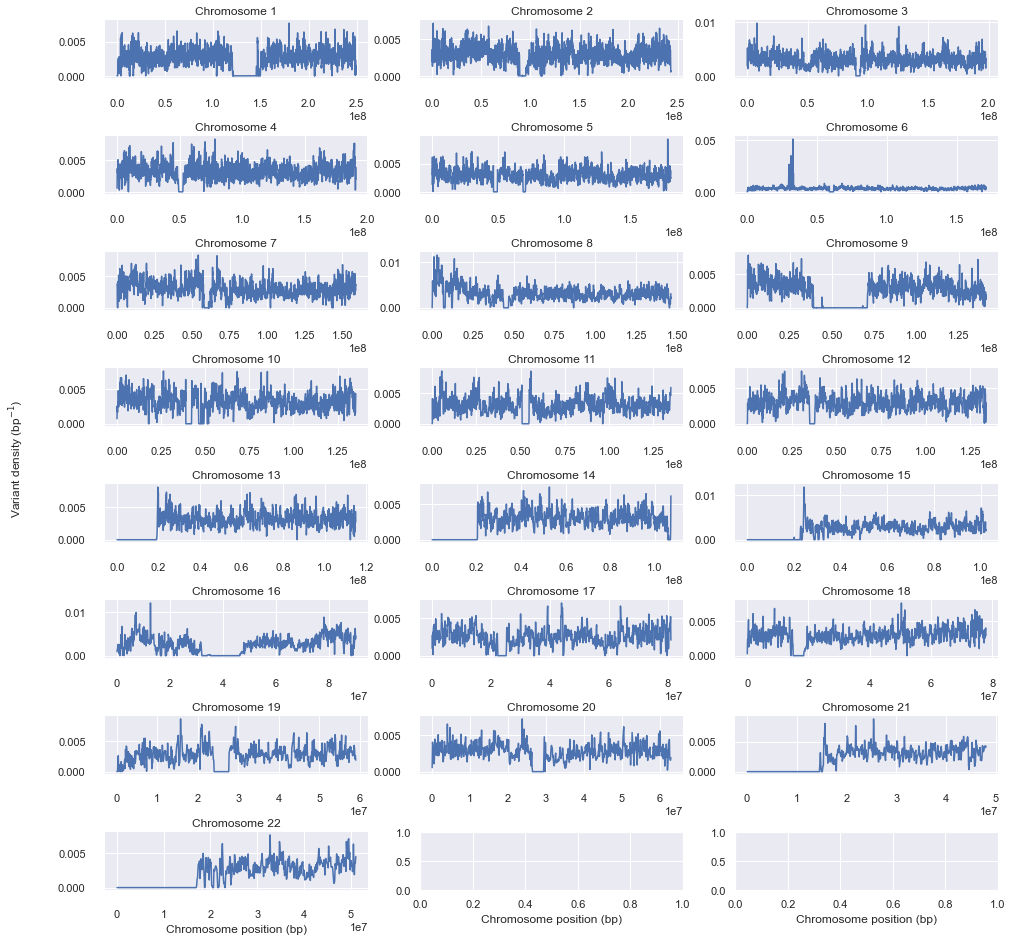

In [3]:
def plot_windowed_variant_density(pos, window_size, title=None, ax=None):
    
    # setup windows 
    bins = np.arange(0, pos.max(), window_size)
    
    # use window midpoints as x coordinate
    x = (bins[1:] + bins[:-1])/2
    
    # compute variant density in each window
    h, _ = np.histogram(pos, bins=bins)
    y = h / window_size
    
    # plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 3))
    sns.despine(ax=ax, offset=10)
    ax.plot(x, y)
    if title:
        ax.set_title(title)

def big_density_plot(gwas, save='', window_size=100000):
    nchromes = len(gwas['CHR'].unique())
    ncols = 3
    nrows = int((nchromes+2)/ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 2*nrows))
    for i, ax in enumerate(axes.flatten()):
        gwas_sortbypos = gwas[gwas["CHR"] == i+1].sort_values("BP")
        if gwas_sortbypos.empty:
            break
        plot_windowed_variant_density(gwas_sortbypos['BP'].values, window_size=window_size, 
                                      ax=ax, title=f"Chromosome {i+1}")

    axes[-1, 0].set_xlabel('Chromosome position (bp)')
    axes[-1, 1].set_xlabel('Chromosome position (bp)')
    axes[-1, 2].set_xlabel('Chromosome position (bp)')

    fig.subplots_adjust(hspace=1, wspace=.2)
    fig.text(0.04, 0.5, 'Variant density (bp$^{-1}$)', va='center', 
             rotation='vertical')

    if save:
        plt.savefig(save, bbox_inches='tight')

big_density_plot(gwas)

### Data reorganization

#### add -log10(p)

In [4]:
gwas["pvalue"] = gwas["P"].apply(lambda x: -1 * np.log10(x))
gwas.drop(columns=["P"], inplace=True)
gwas.head()

,CHR,SNP,BP,A1,A2,INFO,OR,SE,pvalue
0,1,rs202152658,751343,A,T,0.884,1.03118,0.0221,0.781464
1,1,rs143225517,751756,T,C,0.884,0.96977,0.0221,0.781464
2,1,rs3094315,752566,A,G,0.943,0.96002,0.0190,1.493766
3,1,rs3131972,752721,A,G,0.939,1.04081,0.0188,1.481354
4,1,rs3131971,752894,T,C,0.940,1.04300,0.0191,1.557207


In [5]:
gwas.sample(5)

,CHR,SNP,BP,A1,A2,INFO,OR,SE,pvalue
1710648,3,rs111771188,139096093,A,AT,0.995,1.00120,0.0135,0.030817
397568,1,rs7514888,174990905,T,C,0.970,1.03262,0.0143,1.610657
3480674,6,rs4143943,140159178,A,G,1.000,1.00321,0.0136,0.090070
253527,1,rs321251,96470231,T,C,0.997,1.04050,0.0156,1.959793
6009015,12,rs11610896,117973915,A,G,0.990,0.98275,0.0136,0.693789


### Manhattan Plot

In [6]:
import geneview

from importlib import reload
reload(geneview)

from itertools import groupby, cycle
from functools import cmp_to_key
from operator import itemgetter

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as pl

def manhattan(gwas, save=''):
    fix, ax = plt.subplots(figsize=(16,12))
    xnums = map(str, list(range(1, 22)))
    xtick = ['chr'+c for c in xnums]
    ax = geneview.gwas.manhattanplot(gwas[["CHR", "BP", "pvalue"]], xlabel="Chromosome",
                          ylabel="-Log10(P-value)", mlog10=False,
                          xtick_label_set=xtick, s=5, ax=ax);
    ax.set_title("ADHD GWAS");  # xtick labels are messed up
    
    if save:
        plt.savefig(save, bbox_inches="tight")

#### p-value histogram

In [7]:
# sns.distplot(gwas["pvalue"], rug=True, bins=60, axlabel="-log(P-value)");
# plt.title("Histogram of GWAS p-values (logarithmic)")
# plt.savefig("pvalue_hist.png")

#### Unique base pairs

In [8]:
n_gwas = len(gwas)
n_unique_BP = len(gwas.loc[:, "BP"].unique())

print(f"gwas length: {n_gwas}")
print(f"Number of unique positions: {n_unique_BP}")

gwas length: 8047420
Number of unique positions: 7842857


In [11]:
gwas.groupby("CHR")["BP"].describe()

,count,mean,std,min,25%,50%,75%,max
CHR,,,,,,,,
1,7689.0,1.167961e+08,7.052211e+07,2278240.0,48233393.00,96887252.0,1.884490e+08,248335727.0
2,7788.0,1.265257e+08,7.046565e+07,417167.0,63926648.25,145638685.0,1.850596e+08,242058149.0
3,10013.0,8.622466e+07,5.238997e+07,1714889.0,43299878.00,85060324.0,1.257060e+08,197822313.0
4,8829.0,9.203653e+07,5.083400e+07,700136.0,35609673.00,94196595.0,1.361206e+08,190359855.0
5,6566.0,9.937941e+07,4.457304e+07,490868.0,78752664.75,103926514.0,1.437035e+08,180660259.0
6,6315.0,7.682234e+07,4.755792e+07,888109.0,34005817.00,70230358.0,1.150355e+08,170231921.0
7,6256.0,7.295634e+07,4.879646e+07,1819179.0,20210404.75,71712039.5,1.165350e+08,158431718.0
8,5359.0,7.093705e+07,4.551815e+07,275457.0,23160795.00,74912241.0,1.073111e+08,146121767.0
9,3753.0,7.472890e+07,4.442707e+07,281029.0,29113616.00,86459970.0,1.090590e+08,139297921.0


#### Only use 100,000 SNPs with highest pvalues

In [9]:
gwas = gwas.sort_values("pvalue", ascending=False)[:100000]

In [10]:
# grab top RSIDs by p-value
rsids = gwas.sort_values(["CHR", "pvalue"], ascending=[True, False])[:100000]
rsids = rsids[rsids["SNP"].str.startswith("rs")]
rsids = rsids[:300]["SNP"]

rsids.to_csv("rsids_preclust.txt", header=False, index=False)

#### Create clusters by position using MeanShift

In [13]:
from sklearn.cluster import MeanShift

# Make bins clustered by position using sklearn's MeanShift clustering
def bin_chrom(pos_chrom, bw=400000):
    # pos_chrom is a Series of positions within a particular chromosome
    X = np.atleast_2d(pos_chrom.values).T
    ms = MeanShift(bandwidth=bw, n_jobs=6)
    ms.fit(X)
    return ms

def get_bins(pos_chrom, bw=400000):
    ms = bin_chrom(pos_chrom, bw)
    return ms.labels_

groups = gwas.groupby("CHR")["BP"]
gwas["bin"] = groups.transform(get_bins)

# For each bin, grab the SNP with the maximum p-value
max_idxs = gwas.groupby(["CHR", "bin"])["pvalue"].idxmax()
only_max = gwas.loc[max_idxs].sort_values(["CHR", "BP"]).drop("bin", axis=1)
only_max = only_max.sort_values(["CHR", "pvalue"], ascending=[True, False])

# Create convenience dataframes, sorted within chromosome by either pvalue or position
by_pval = only_max.sort_values(["CHR", "pvalue"], ascending=[True, False])
by_pos = only_max.sort_values(["CHR", "BP"], ascending=True)

# TODO

## linkage disequilibrium

In [14]:
by_pval

,CHR,SNP,BP,A1,A2,INFO,OR,SE,pvalue
109899,1,rs11420276,44184192,G,GT,0.982,1.11316,0.0146,12.668978
253892,1,rs1222063,96602440,A,G,0.860,1.10098,0.0174,7.513145
400068,1,rs10693524m,175784215,A,AATTCATTC,0.838,0.84409,0.0349,5.915781
75196,1,rs9661242,30088755,A,G,0.970,0.93932,0.0135,5.444664
469339,1,rs17652815,199640708,T,C,0.972,0.86347,0.0322,5.299123
...,...,...,...,...,...,...,...,...,...
8020380,22,rs2071726,43619062,C,G,0.941,1.04896,0.0155,2.692504
8031486,22,rs45440696,47058897,T,C,0.870,0.82465,0.0626,2.683191
7965086,22,rs12159250,25144676,T,C,0.909,0.90457,0.0329,2.638650
8010337,22,rs5757577,39642694,A,G,0.895,0.95285,0.0160,2.595508


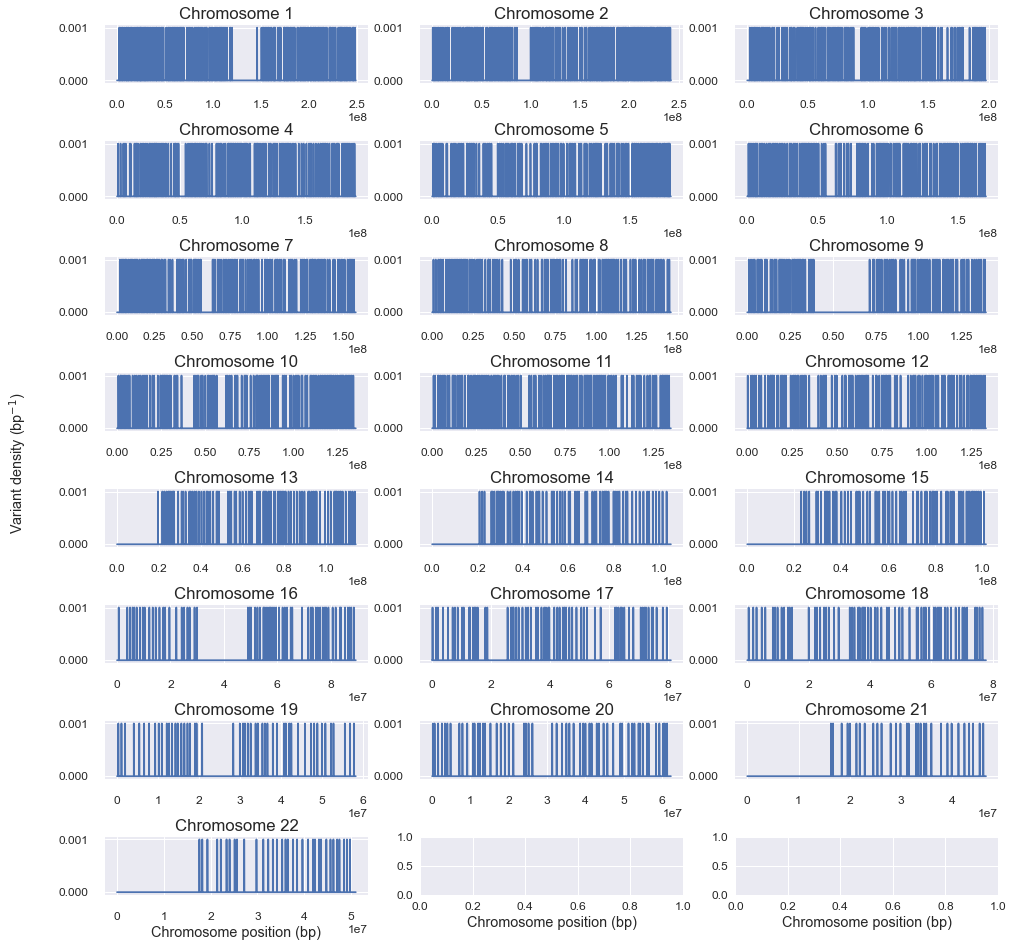

In [15]:
big_density_plot(by_pos, window_size=1000)

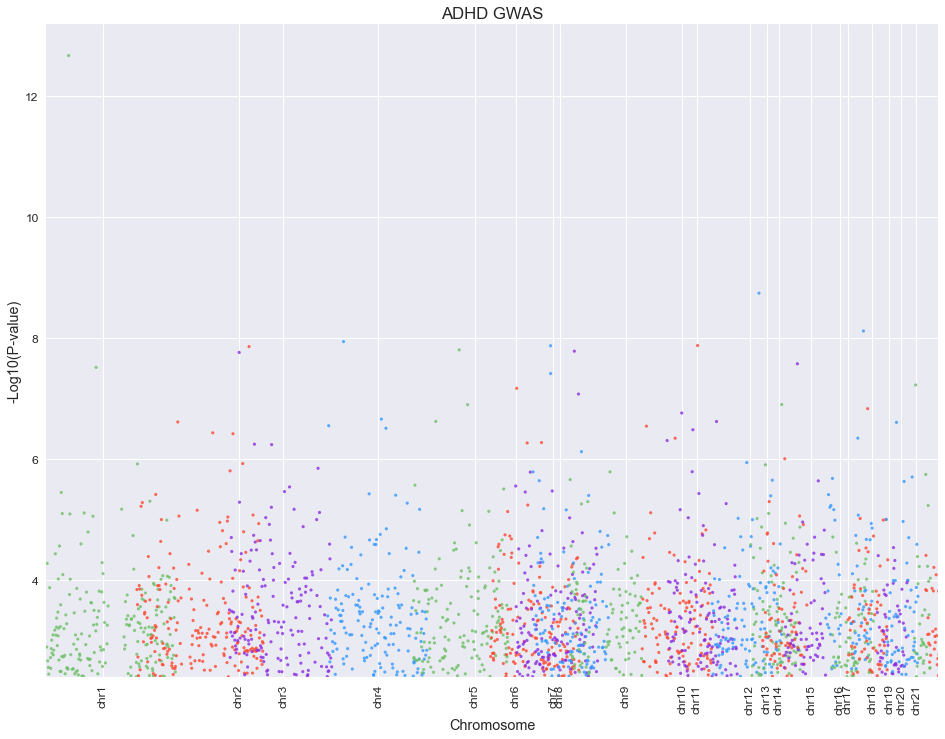

In [16]:
def manhattan(gwas, save='', s=5):
    fix, ax = plt.subplots(figsize=(16,12))
    xnums = map(str, list(range(1, 22)))
    xtick = ['chr'+c for c in xnums]
    ax = geneview.gwas.manhattanplot(gwas[["CHR", "BP", "pvalue"]], xlabel="Chromosome",
                          ylabel="-Log10(P-value)", mlog10=False,
                          xtick_label_set=xtick, s=s, ax=ax);
    ax.set_title("ADHD GWAS");  # xtick labels are messed up
    
    if save:
        plt.savefig(save, bbox_inches="tight")

manhattan(by_pval, s=10, save="manhattan_post_filter.png")

#### Get RSIDs

In [31]:
# grab top RSIDs by p-value
rsids = by_pval[by_pval["CHR"] == 1]
rsids = rsids[rsids["SNP"].str.startswith("rs")]
rsids = rsids["SNP"]

rsids.to_csv("rsids_postclust.txt", header=False, index=False)

### LDPred

#### Save by_pval into PLINK bed file

In [ ]:
import ldpred

python LDpred.py coord \
    --rs SNP \
    --A1 A1 \
    --A2 A2 \
    --pos BP \
    --chr CHR \
    --pval P \
    --eff OR \
    --ssf-format CUSTOM \
    --N 253288 \
    --ssf Height.QC.gz \
    --out EUR.coord \
    --gf EUR.ldpred
Adjust the effect size estimates:

# LDpred recommend radius to be Total number of SNPs in target / 3000
 python LDpred.py gibbs \
    --cf EUR.coord \
    --ldr 183 \
    --ldf EUR.ld \
    --out EUR.weight \
    --N 253288
Calculate the PRS:

python LDpred.py score \
    --gf EUR.ldpred \
    --rf EUR.weight \
    --out EUR.score \
    --pf EUR.height \
    --pf-format LSTANDARD 